In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Introduction
For this assignment, I want to focus on analyze the relationship between shelter usage and time of year in order to better understand the temporal pattern of shelter usage. This assignment consist of two research questions: 
whether the usage of shelter changes over time in 2021
whether the capacity of provided shelter program changes enough to adjust to the change of demand.



### 1.Read And Clean the Data

In [2]:
df = pd.read_excel("INF2178_A1_data.xlsx", sheet_name= "data")
df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [3]:
# check for missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

In [4]:
# remove missing value in program_model, type and area
df = df.dropna(subset=['PROGRAM_MODEL', 'OVERNIGHT_SERVICE_TYPE', 'PROGRAM_AREA'])

### 2. EDA

In [5]:
# see basic descriptive statistic for different column
df.describe()

,OCCUPANCY_DATE,PROGRAM_ID,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
count,50942,50942.000000,50942.000000,32397.000000,32397.000000,18545.000000,18545.000000
mean,2021-06-29 13:21:33.094107136,13986.022005,45.728515,31.628145,29.781400,55.549259,52.798598
min,2021-01-01 00:00:00,11791.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2021-03-30 00:00:00,12233.000000,15.000000,15.000000,14.000000,19.000000,16.000000
50%,2021-06-28 00:00:00,14251.000000,28.000000,25.000000,23.000000,35.000000,34.000000
75%,2021-09-29 00:00:00,15651.000000,51.000000,43.000000,41.000000,68.000000,66.000000
max,2021-12-31 00:00:00,16611.000000,339.000000,234.000000,234.000000,268.000000,268.000000
std,NaN,1705.241577,53.326660,27.128189,26.379825,59.448805,58.792954


We can see that on average a shelter takes 45 person one day, and the average capacity is higher than average usage. 

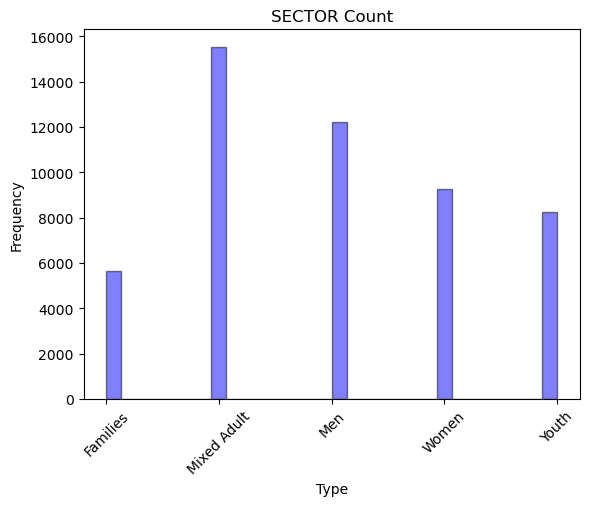

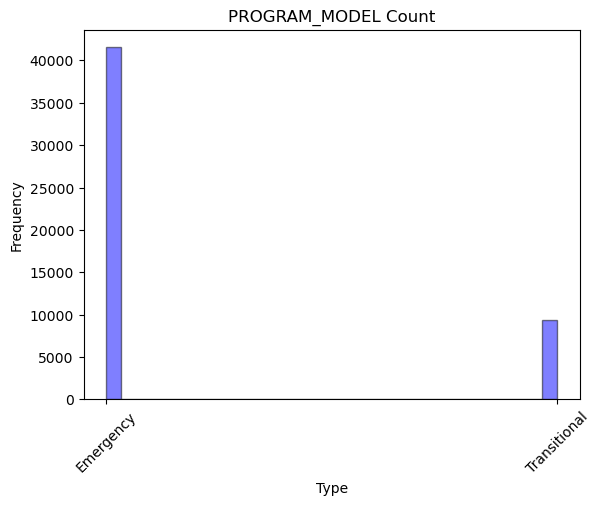

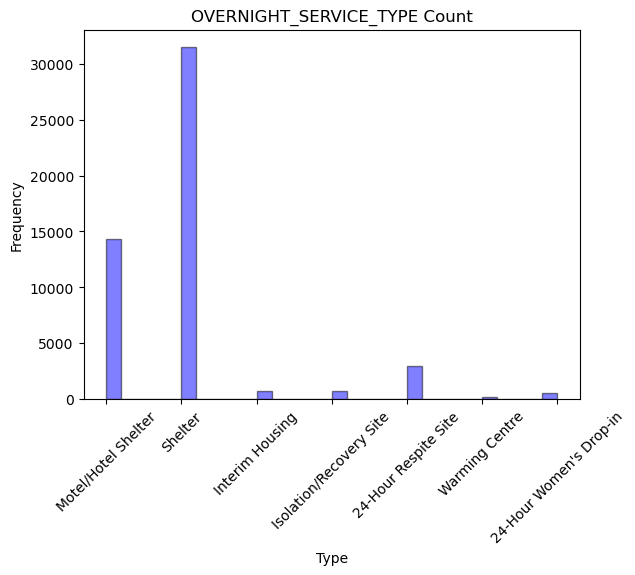

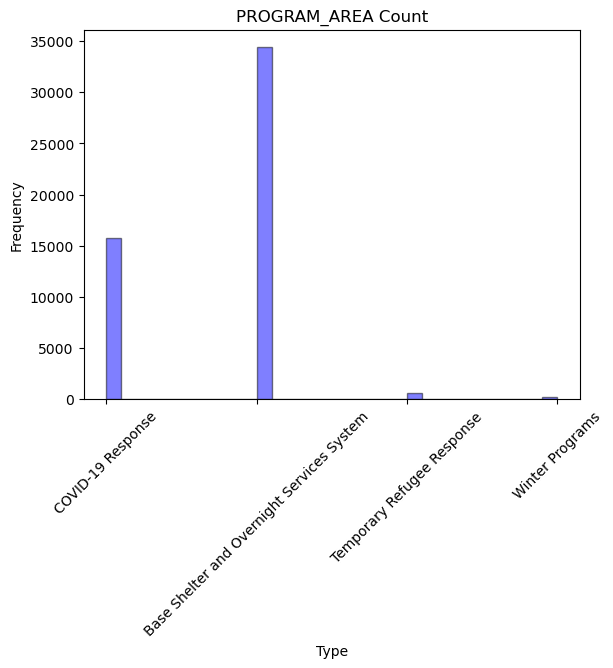

In [6]:
# visualize number of different type of shelter, show as historgram
column_to_plot = ['SECTOR', 'PROGRAM_MODEL', 'OVERNIGHT_SERVICE_TYPE', 'PROGRAM_AREA']

for column in column_to_plot:
    plt.hist(df[column], bins=30, alpha=0.5, color='blue', edgecolor='black')
    plt.title(column + ' ' + 'Count')
    plt.xlabel('Type')
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.show()

Based on the graph, we can see that the majority of shelter is mix adult, emergency, regular shelter, and belongs to base shelter and overnight services system. Since this assignment focus on temporal pattern analysis, further detailed examination of the relationship between these groups will not be performed. 

In [7]:
# create column for room and bed occupancy rate, which is the room / bed being occupied
df["bed_occupancy_rate"] = df['OCCUPIED_BEDS']/df['CAPACITY_ACTUAL_BED']
df["room_occupancy_rate"] = df['OCCUPIED_ROOMS']/df['CAPACITY_ACTUAL_ROOM']

df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,bed_occupancy_rate,room_occupancy_rate
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0,NaN,0.896552
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0,NaN,1.000000
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0,NaN,0.821429
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0,NaN,1.000000
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0,NaN,0.928571


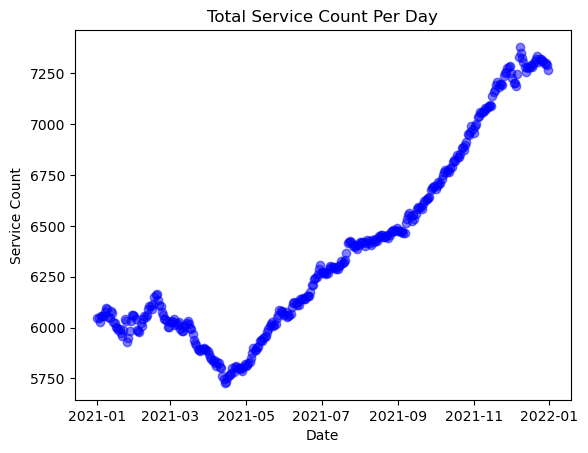

In [8]:
# creating scatter plot for total usage
df_avg = df.groupby('OCCUPANCY_DATE').sum('SERVICE_USER_COUNT')

plt.scatter(df_avg.index, df_avg['SERVICE_USER_COUNT'],  alpha = 0.5, color='blue')
plt.title('Total Service Count Per Day')
plt.xlabel('Date')
plt.ylabel('Service Count')
plt.show()

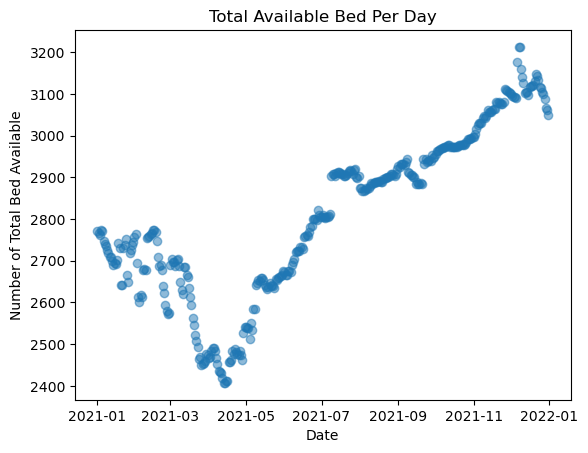

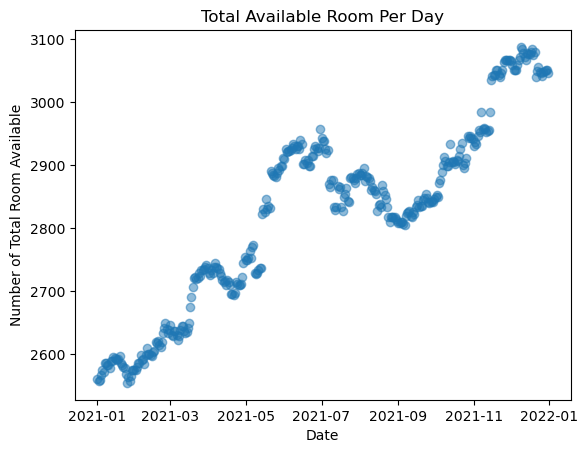

In [9]:
# creating scatter plot for total capacity
df_avg = df.groupby('OCCUPANCY_DATE').sum()
plt.scatter(df_avg.index, df_avg['CAPACITY_ACTUAL_BED'], alpha=0.5)
plt.title('Total Available Bed Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Total Bed Available')
plt.show()

df_avg = df.groupby('OCCUPANCY_DATE').sum()
plt.scatter(df_avg.index, df_avg['CAPACITY_ACTUAL_ROOM'], alpha=0.5)
plt.title('Total Available Room Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Total Room Available')
plt.show()

From the graphs, we can see that capacity and usage of shelter gradually increase from spring to winter, and go down from winter to spring. While these graphs tell us the usage and capacity of every day, it is hard to see whether the increase in capacity matches the increase in user. To reflect this, choosing the correct metrics is important. For this data, I decided to use bed occupancy rate and room occupancy rate, which are calculated based on room/bed occupied and maximum capacity of shelter.

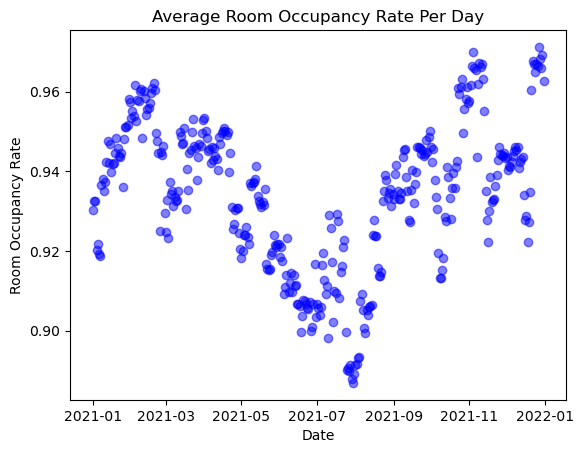

In [10]:
# visualize occupancy rate across time
df_avg = df.groupby('OCCUPANCY_DATE').mean('room_occupancy_rate')

plt.scatter(df_avg.index, df_avg['room_occupancy_rate'],  alpha = 0.5, color='blue')
plt.title('Average Room Occupancy Rate Per Day')
plt.xlabel('Date')
plt.ylabel('Room Occupancy Rate')
plt.show()

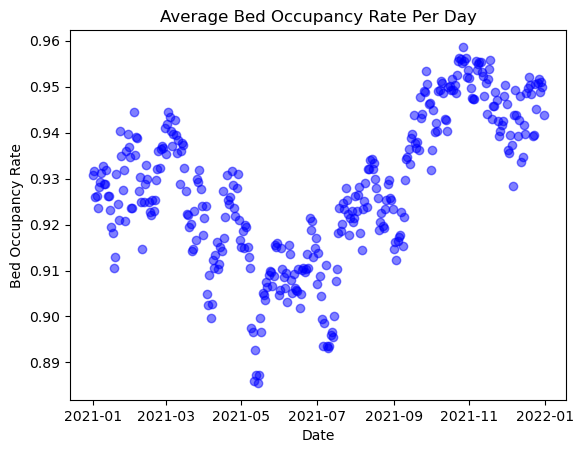

In [11]:
# visualize occupancy rate across time
df_avg = df.groupby('OCCUPANCY_DATE').mean('bed_occupancy_rate')

plt.scatter(df_avg.index, df_avg['bed_occupancy_rate'],  alpha = 0.5, color='blue')
plt.title('Average Bed Occupancy Rate Per Day')
plt.xlabel('Date')
plt.ylabel('Bed Occupancy Rate')
plt.show()

We can see that there seems to be a seasonal pattern in shelter usage. The shelter usage tends to be high during winter and low during summer. But is this relationship significant enough? To answer this question within the scope of this assignment, I decided to use t-tests to examine the differences between seasons.

To better perform the t-test, the date will be divided to different seasons, and the hypothesis is that usage (occupancy rate) of shelter increase in winter and decrease in summer, compare to other time of the year. 

In [12]:
# Create season column based on Month
df['Season'] = 'Other'
df.loc[df['OCCUPANCY_DATE'].dt.month.isin([12, 1, 2]), 'Season'] = 'Winter'
df.loc[df['OCCUPANCY_DATE'].dt.month.isin([3, 4, 5]), 'Season'] = 'Spring'
df.loc[df['OCCUPANCY_DATE'].dt.month.isin([6, 7, 8]), 'Season'] = 'Summer'
df.loc[df['OCCUPANCY_DATE'].dt.month.isin([9, 10, 11]), 'Season'] = 'Fall'
df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,bed_occupancy_rate,room_occupancy_rate,Season
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0,NaN,0.896552,Winter
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0,NaN,1.000000,Winter
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0,NaN,0.821429,Winter
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0,NaN,1.000000,Winter
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0,NaN,0.928571,Winter


In [13]:
# seperate the data in to bed and room based
room_based = df[df['CAPACITY_TYPE'] == 'Room Based Capacity']
bed_based = df[df['CAPACITY_TYPE'] == 'Bed Based Capacity']

In [14]:
# The following are t-test on season and different occupancy rate
# Test 1

summer = bed_based[bed_based['Season'] == 'Summer']
x = summer['bed_occupancy_rate']


other = bed_based[(bed_based['Season'] == 'Fall')|(bed_based['Season'] == 'Spring')]
y = other['bed_occupancy_rate']

t_stat, p_val = stats.ttest_ind(x, y, alternative='less')
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = -9.069980380945879
p-value = 6.390947000043207e-20


In [15]:
# Test 2

winter = bed_based[bed_based['Season'] == 'Winter']
x = winter['bed_occupancy_rate']

other = bed_based[(bed_based['Season'] == 'Fall')|(bed_based['Season'] == 'Spring')]
y = other['bed_occupancy_rate']

t_stat, p_val = stats.ttest_ind(x, y, alternative='greater')
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = 1.871045069238
p-value = 0.030675430703284757


In [16]:
# Test 3

summer = room_based[room_based['Season'] == 'Summer']
x = summer['room_occupancy_rate']

other = room_based[(room_based['Season'] == 'Fall')|(room_based['Season'] == 'Spring')]
y = other['room_occupancy_rate']

t_stat, p_val = stats.ttest_ind(x, y, alternative='less')
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = -9.087629178579402
p-value = 5.733006878615375e-20


In [17]:
# Test 4

winter = room_based[room_based['Season'] == 'Winter']
x = winter['room_occupancy_rate']

other = room_based[(room_based['Season'] == 'Fall')|(room_based['Season'] == 'Spring')]
y = other['room_occupancy_rate']

t_stat, p_val = stats.ttest_ind(x, y, alternative='greater')
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = 2.843462260364103
p-value = 0.0022345708167123795


We can see that compare to other two season, summer does have significant decrease in occupancy rate. Moreover, both test for winter get a p-value that is lower than 0.05. This suggest that there is significant evidence to support the all alternative hypothesis. 